# 1.2 - Beginner - Dispersion and Dependence

COMET Team <br> *Oliver (Junye) Xu, Anneke Dresselhuis, Jonathan
Graves*  
2023-01-12

## Outline

### Prerequisites

-   Introduction to Jupyter
-   Introduction to R
-   Introduction to Visualization
-   Central Tendency
-   Distribution

### Outcomes

This notebook explains the concepts of dispersion and dependence. After
completing this notebook, you will be able to:

-   Understand and interpret measures of dispersion, including variance
    and standard deviation
-   Understand and interpret measures of dependence, including
    covariance and correlation
-   Investigate, compute, and interpret common descriptive statistics
-   Create summary tables for variables, including qualitative variables
-   Parse summary statistics for meaning

### References

-   [Introductory
    Statistics](https://openstax.org/books/introductory-statistics/pages/2-7-measures-of-the-spread-of-the-data)

## Introduction

In this notebook, we will continue learning about how to use descriptive
statistics to represent sets of data. We’ve already seen how to compute
measures of central tendency and determine which measures are
appropriate for given situations. We’ll now focus on computing measures
of dispersion and dependence in order to better understand both the
variation of variables, as well as relationships between variables in a
data set. We’ll dedicate time to both measures, but we’ll look at
dispersion first. Let’s first import our familiar 2016 Census data set
from Statistics Canada.

In [ ]:
# load packages
library(tidyverse)
library(haven)
library(ggplot2)

# reading in the data
census_data <- read_dta("../datasets_beginner/01_census2016.dta")

# load self-tests
source("beginner_dispersion_and_dependence_tests.r")

## Part 1: Measures of Dispersion for a Single Variable

Measures of dispersion describe the spread of data, that is, the
possible values that a variable in a data set can take on. Common
measures of dispersion which we’ll look at include the range,
interquartile range, standard deviation and variance.

### Range and interquartile range

The **range** of a variable is the difference between the maximum and
minimum value that a variable takes on.

The **interquartile range** of a variable is the difference between the
75th and 25th percentile values of the variable. We can use functions
like `quantile()` and `fivenum()` to calculate these statistics quite
quickly.

> **Note**: both `quantile()` and `fivenum()` return the same output: a
> list with different percentiles of the data. By default, these are the
> minimum, 25th percentile, 50th percentile (median), 75th percentile,
> and maximum values.

### Variance

The **variance** is the average of the squared differences from the
mean.

-   Small variance: observations tend to fall close to the mean
-   High variance: observations are very spread out from the mean.

The formula for the sample variance is:

$$
s_{x}^2 = \frac{\sum_{i=1}^{n} (x_i - \overline{x})^2}{n - 1}
$$

The formula for the variance in a population is:

$$
\sigma_{x}^2 = \int(x - \mu)^2 f(x) dx
$$

### Standard deviation

The **standard deviation** is the square root of the variance. It also
measures dispersion around the mean, similar to the variance. For a
sample this is:

$$
s_{x} = \sqrt{s_{x}^2} = \sqrt{\frac{\sum_{i = 1}^{n} (x_i - \overline{x})^2}{n - 1}}
$$

For the population:

$$
\sigma_{x} = \sqrt{\sigma_{x}^2}
$$

> **Example**: a normal distribution with `mean = 30` and `sd = 5` is
> exactly the same thing as a normal distribution with `mean = 30` and
> `variance = 25`.

We usually use standard deviations rather than variances because the
variance does not have the *same units* as the original variable, while
the standard deviation does.

> **Advanced Note**: In econometrics, some samples have more information
> than others about the population.For example, an estimate of the
> population variance based on a sample size of 100 certainly has more
> information than a sample size of 10. We measure the degree of
> uncertainty of an estimate using the **degrees of freedom** of an
> **estimate**. The degrees of freedom for our estimate of variance
> (sample variance) is equal to $n - 1$.

In R, we use the `var()` function to calculate the variance of a
variable, and the `sd()` function for the standard deviation.

In [ ]:
# calculate the variance of wage
variance <- var(census_data$wages, na.rm = TRUE) # remember that we need to remove all NA values

### Test your knowledge

Calculate the standard deviation of wages by filling in the code on the
cell below.

In [ ]:
# fill in the ... with your code below to find the sd of wages - round your answer to the nearest whole number

answer_1 <- ...()
test_1()

### Interpreting Variation

Let’s say we’re interested in understanding how the `wages` variable is
dispersed around the mean.

In [ ]:
# recall the mean of wages
mean(census_data$wages, na.rm = TRUE) 

# calculate the standard deviation of wages
sd(census_data$wages, na.rm = TRUE) 

We have a pretty large standard deviation - even larger than our mean!
This tells us that most of the Canadians in the data set have a wage
which lies approximately \$64275.27 away from the mean of \$54482.52.

This large standard deviation tells us that there is high variation in
wages and that some of them are very far from the mean. This can be for
many reasons, but one possibility is that we have **outliers** in the
data set: extreme values of the variable `wages`. This is common for
wage distributions in the presence of income inequality.

> **To Remember**: the standard deviation is small when the data are all
> concentrated close to the mean, while the standard deviation is large
> when the data are spread out away from the mean.

### Empirical Rule

Recall, from the *Central Tendency* notebook, that a very important
distribution in econometrics is the **normal distribution**. For a
variable with values distributed in this way, there is a quick way to
estimate the density of the distribution with the standard deviation.
This is called **68-95-99.7 rule** or **Empirical Rule**:

-   68% of the values are within 1 standard deviation of the mean
-   95% are within 2 standard deviations of the mean
-   99.7% are within 3 standard deviations from the mean
-   Remaining values are outliers and incredibly rare

<figure>
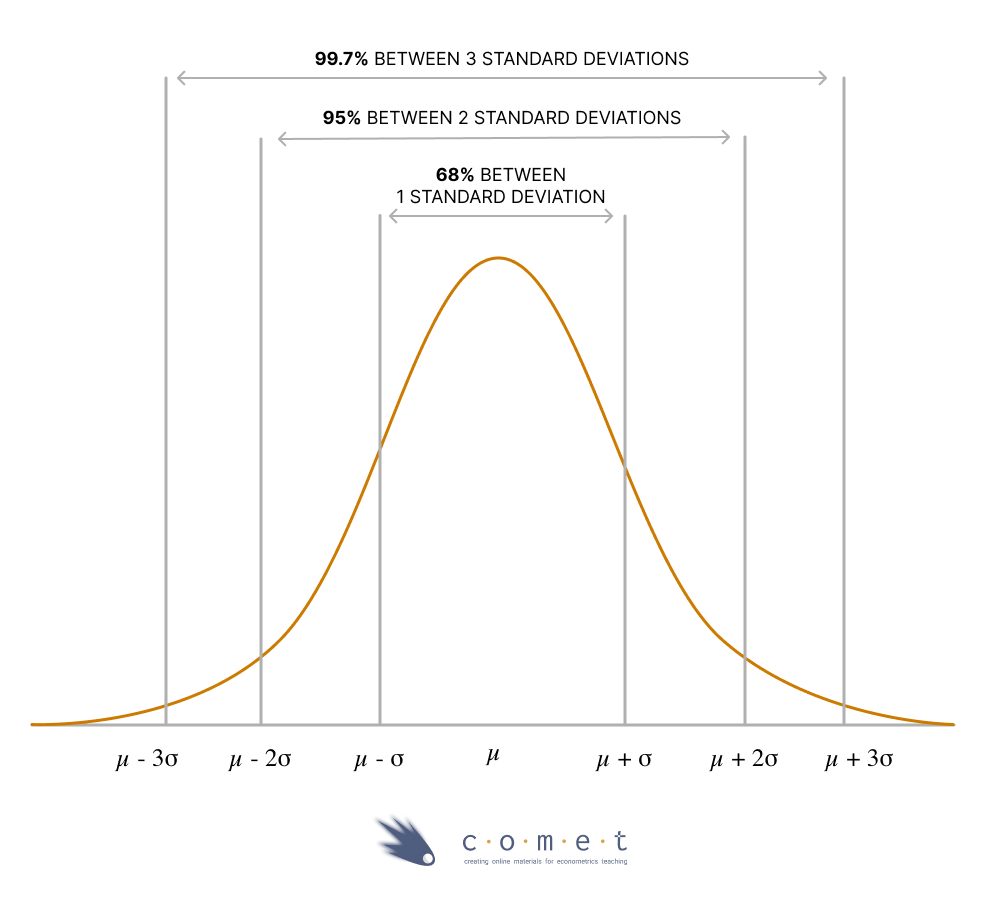
<figcaption aria-hidden="true">“Empirical rule”</figcaption>
</figure>

This gives us a helpful frame of reference when discussing the standard
deviation of a variable.

For example: let’s take test scores. Assuming test scores are normally
distributed, if the mean score on a test is 70 and the standard
deviation is 10, this tells us that approximately 68% of students who
wrote that test earned a score between 60 and 80 (1 standard deviation),
approximately 95% earned a score between 50 and 90 (2 standard
deviations) and virtually everyone earned a score between 40 and 100 (3
standard deviations).

### Test your knowledge

Let’s suppose the mean test score of my ECON 325 exam was 70 and the
standard deviation was 5. If test scores are normally distributed and my
grade was 85, what percentage of students got a grade higher than mine?

> **Hint**: The area under the normal distribution has to sum to 1.

In [ ]:
# write your answer in decimal form and don't round

answer_2 <- ...
test_2()

## Part 2: Measures of Dispersion for Multiple Variables

Measures of **dependence** calculate relationships between variables.
The two most common are *covariance* and *correlation*.

### Covariance

**Covariance** is a measure of the direction of a relationship between
two variables.

-   Positive covariance: two variables are positively related
    -   When one variable goes up, the other goes up, and vice versa.
-   Negative covariance: two variables are negatively related.
    -   When one variable goes up, the other goes down, and vice versa.

This is similar to the idea of variance, but where variance measures how
a *single* variable varies, covariance measures how *two* vary together.
They also have similar formulas.

Sample Covariance:

$$
s_{x,y}=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{n-1}
$$

Population Covariance:

$$
\sigma_{x,y}=\int\int(x_{i}-\mu_x)(y_{i}-\mu_y)f(x,y)dxdy
$$

This is tedious to calculate, especially for large samples. In R, we can
use the `cov()` function to calculate the covariance between two
variables. Let’s say we’re interested in exploring the covariance
between the `wages` variable and `mrkinc` variable in the dataset.

In [ ]:
# cov() function requires use="complete.obs" to remove NA entries
cov(census_data$wages, census_data$mrkinc, use="complete.obs") 

The calculated covariance between the `wages` variable and `mrkinc`
variable in the dataset is positive, indicating the two variables are
positively related. As one variable changes, the other variable will
change in the same direction.

Let’s try computing the covariance “by hand” to understand how the
formula really works. To simplify the process, we will construct a
hypothetical data set with variables $x$ and $y$.

In [ ]:
x <- c(6, 8, 10)
y <- c(25, 100, 125)

In [ ]:
# find the average values of x and y
avg_x <- mean(x)
avg_y <- mean(y)

# sum the products of the differences between the observations and the average
numerator <- {(x[1] - avg_x)*(y[1] - avg_y) + (x[2] - avg_x)*(y[2] - avg_y) + (x[3] - avg_x)*(y[3] - avg_y)}

# denominator is the sample size minus 1
denominator <- 3-1

print(numerator/denominator)

In [ ]:
# confirming the previous calculation
cov(x,y)

Interpreting covariances directly is difficult because the size of the
covariance depends on the scale of $x$ and $y$. Repeat the preceding
calculation, but with variables that are 10x as large. What do you see?

In [ ]:
x <- c(60, 80, 100)
y <- c(250, 1000, 1250)

cov(x,y)

The solution to this problem is the next topic: correlation.

### Correlation

A **correlation coefficient** measures the relationship between two
variables. It allows us to know both if two variables move in the same
direction (positive correlation), or in the opposite directions
(negative correlation), or if they have no relationship (no
correlation).

> **Note**: even though a covariance or correlation may be zero, this
> does not mean that there is no relationship between the variables -
> this only means that there is no *linear* relationship.

Correlation fixes the scale problem with covariance by standardizing
covariance to a scale of -1 to 1. It does this by dividing the
covariance by the standard deviations of the variables. The most popular
version is **Pearson’s correlation coefficient** which is calculated as
follows.

$$
r_{x,y} = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2 \sum_{i=1}^{n}(y_i - \overline{y})^2}}=\frac{s_{x,y}}{s_{x} s_{y}}
$$

Once again, let’s try to compute the correlation “by hand” using the
formula above.

In [ ]:
numerator <- sum((x - mean(x))*(y - mean(y)))
denominator <- sqrt(sum((x - mean(x))^2) * sum((y - mean(y))^2))
numerator/denominator

In [ ]:
numerator <- cov(x,y)
denominator <- sd(x) * sd(y)
numerator/denominator

In R, we can use the `cor()` function to calculate the correlation
between two variables.

In [ ]:
# Confirming the previous calculation
cor(x,y)

To calculate the correlation between the `wages` variable and `mrkinc`
variable in the dataset:

In [ ]:
# cor() function requires use="complete.obs" to remove NA entries
cor(census_data$wages, census_data$mrkinc, use="complete.obs") 

Now we have the number 0.8898687 $\approx$ 0.89 as our correlation
coefficient. What does it really mean?

A correlation coefficient ranges from -1 to 1, which tells us two
things:

1.  The direction of the relationship between the 2 variables.

    -   A negative correlation coefficient means that two variables move
        in opposite directions. If a variable increases the other
        decreases and vice versa.
    -   A positive correlation implies that the two variables move in
        the same direction, that is, if one variable increases the other
        also increases and vice versa.

2.  The strength of the relationship between the 2 variables.

    -   The more extreme the correlation coefficient (the closer to -1
        or 1), the stronger the relationship. The less extreme the
        correlation coefficient (the closer to 0), the weaker the
        relationship.
    -   Two variables are uncorrelated if the correlation coefficient is
        close to 0. As one variable increases, there is no tendency in
        the other variable to either decrease or increase.

<figure>
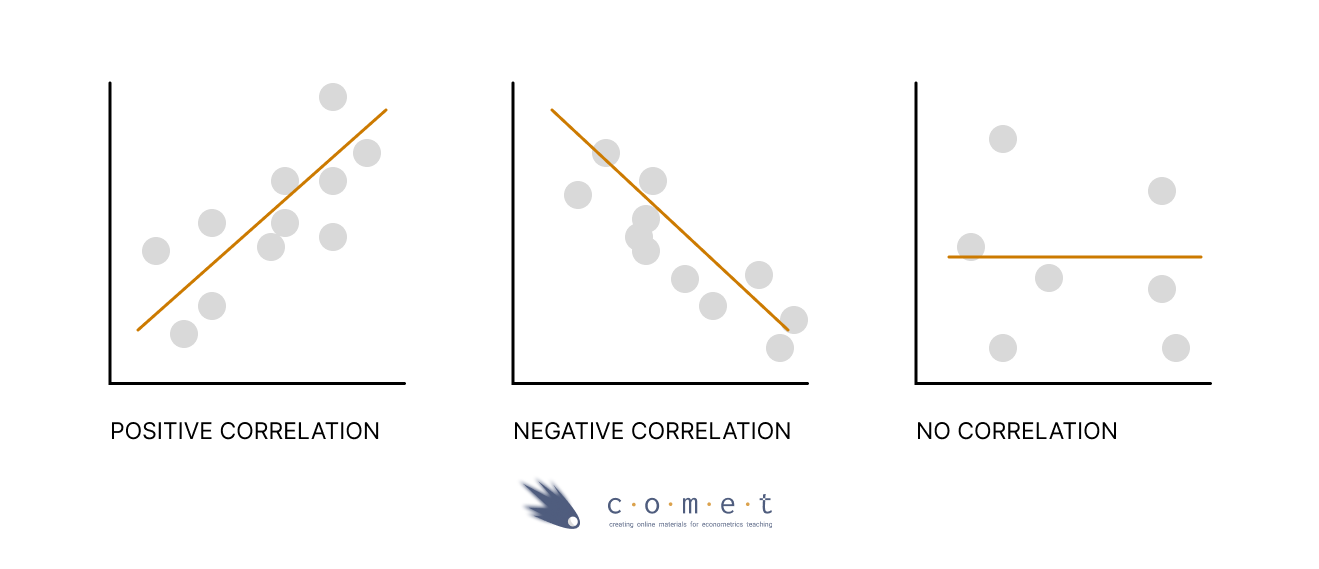
<figcaption aria-hidden="true">Three scatter plots are shown
demonstrating positive, negative and no correlation”</figcaption>
</figure>

We can also easily visualize the correlation between two variables by
plotting scatter plot with a trend line via the `ggplot()` function.

In [ ]:
# scatterplot of market income against wages
ggplot(census_data, aes(x = mrkinc, y = wages)) +
       geom_point(shape = 1)

Adding a trend line to the scatter plot helps us interpret the
directionality of two variables. We can do it via the `geom_smooth()`
function by including the `method = lm` argument, which displays
scatterplot patterns in the presence of overplotting. You will learn
more about how trend lines are mathematically formulated in advanced
econometrics classes.

In [ ]:
ggplot(census_data, aes(x = mrkinc, y = wages)) +
  geom_point(shape = 1) +
  geom_smooth(method = lm) # add this argument to draw the trendline

Now we can see the apparent positive correlation!

### Test your knowledge

Is the following statement True or False?

The correlation coefficient adjusts the measure of covariance so that it
can measure linear relatinoships.

In [ ]:
answer_3 <-  "..." # enter "True" or "False"

test_3()

Suppose the weights of packages(in lbs) at a particular post office are
recorded as below.

In [ ]:
package_data <- c(95, 130, 148, 183, 100, 98, 137, 110, 188, 166)

In [ ]:
# calculate the mean, standard deviation and variance of the weights of packages
# round all answers to 2 decimal places

answer_4 <- # enter your answer here for mean
answer_5 <- # enter your answer here for standard deviation 
answer_6 <- # enter your answer here for variance

test_4()
test_5()
test_6()

Use the example above to answer: Assuming the weights follow a normal
distribution, 68% of packages at the post office weigh how much?

1.  68% of packages weigh between 65.30 and 150.70 lbs
2.  68% of packages weigh between 100.40 and 170.60 lbs
3.  68% of packages weigh between 120.40 and 150.60 lbs
4.  68% of packages weigh between 80.56 and 120.60 lbs

In [ ]:
answer_7 <- "..."    # enter your choice here (ex, "F")

test_7()

Now, brainstorm some real-world examples that best demonstrate the
correlation relationships below. The first one is already done for you!

-   zero or near zero: the number of forks in your house vs the average
    rainfall where you live
-   weak negative:
-   strong positive:
-   weak positive:
-   strong negative: